In [87]:
import numpy as np
import pyvista as pv
from pyvista import examples




c:\Users\dadab\anaconda3\envs\learning_html_environment\Lib\site-packages\pyvista\jupyter\notebook.py:37: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


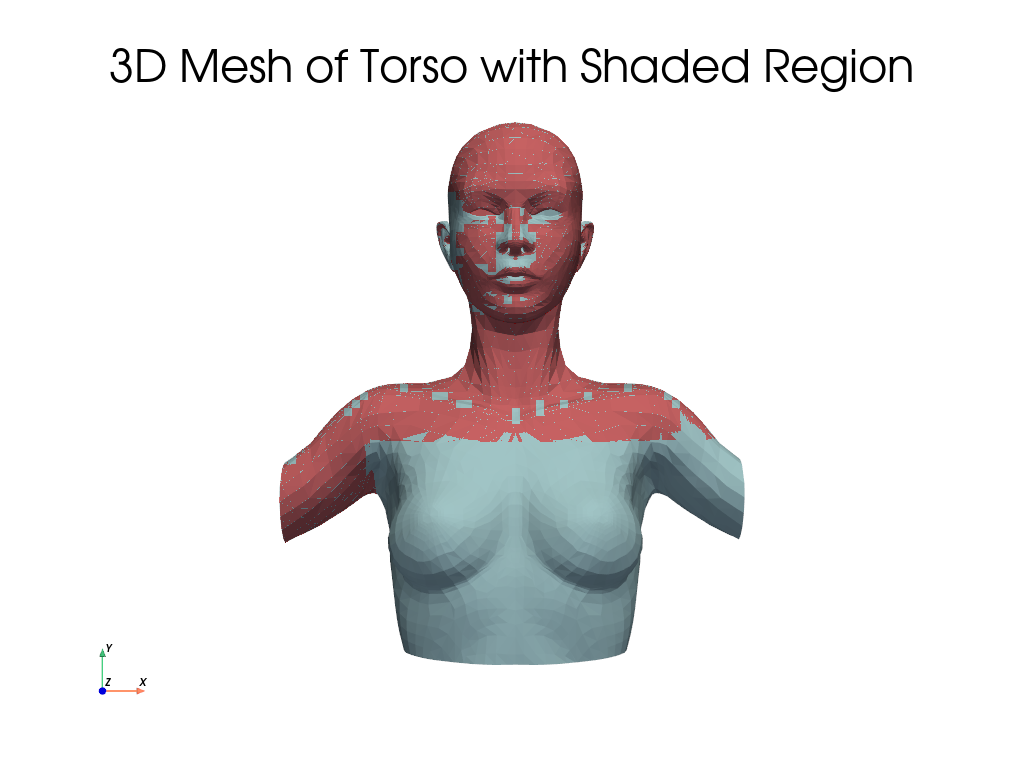

In [108]:
# Load the STL file
my_mesh = pv.read('torso.obj')

def highlight_region(mesh, center, size):
    # Extract the center coordinates
    x_center, y_center, z_center = center
    
    # Calculate the bounds of the square region
    xmin_clip = x_center - size / 2
    xmax_clip = x_center + size / 2
    ymin_clip = y_center - size / 2
    ymax_clip = y_center + size / 2
    zmin_clip = z_center - size / 2
    zmax_clip = z_center + size / 2
    
    # Create clipping planes for each axis
    clipped_mesh = mesh.clip_box([xmin_clip, xmax_clip, ymin_clip, ymax_clip, zmin_clip, zmax_clip])
    
    return clipped_mesh

# Example coordinates and size for the region
center = (0.1, 0, 0)  # Center of the square region
size = 0.5  # Size of the square region

# Highlight the region
highlighted_region = highlight_region(my_mesh, center, size)

# Create a plotter object
plotter = pv.Plotter()

# Add the original mesh to the plotter
plotter.add_mesh(my_mesh, color='lightblue')

# Add the selected region to the plotter with a different color to highlight it
plotter.add_mesh(highlighted_region, color='red', opacity=0.5)  # Shaded region

# Add XYZ axes
plotter.add_axes()

# Set the camera position
plotter.camera_position = 'xy'  # View from the XY plane

# Add a title to the window
plotter.add_title("3D Mesh of Torso with Shaded Region")

# Show the plot with interactive controls
plotter.show()

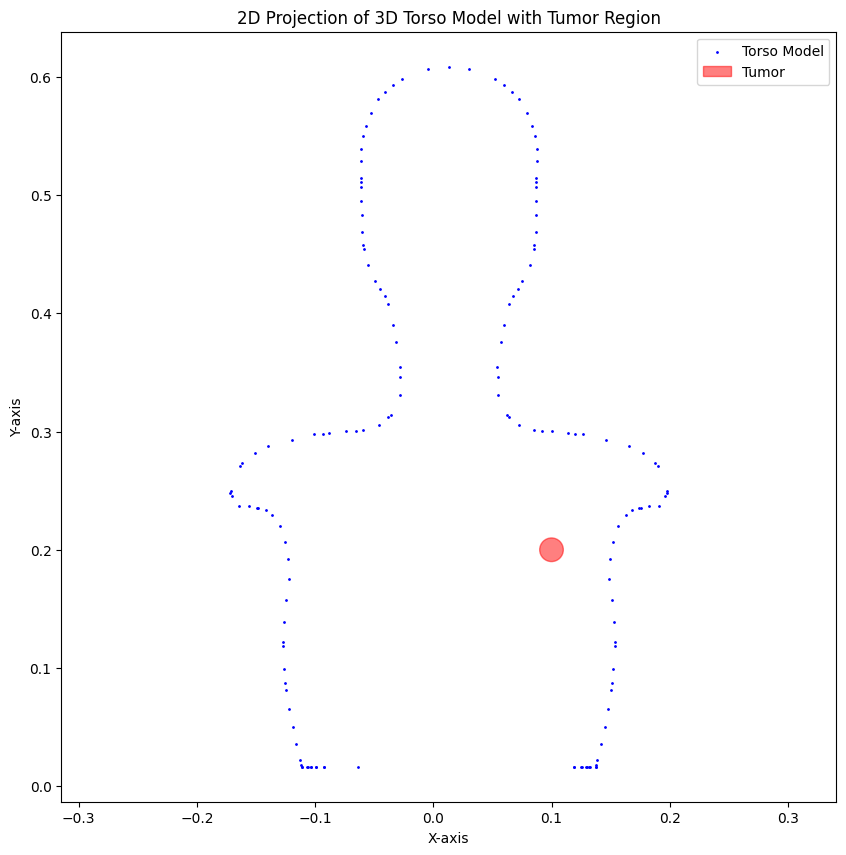

In [9]:
import pyvista as pv
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

# Load the 3D model
mesh = pv.read('torso.obj')

# Define the plane to project onto (XY plane at z=0)
plane = pv.Plane(center=(0, 0, 0), direction=(0, 0, 1))

# Slice the mesh with the plane to get the 2D cross-section
slice_2d = mesh.slice(normal='z')

# Get the coordinates of the sliced 2D data
x = slice_2d.points[:, 0]
y = slice_2d.points[:, 1]

# Example tumor coordinates and radius
tumor_center = (0.1, 0.2)
tumor_radius = 0.01

# Plot the 2D projection
plt.figure(figsize=(10, 10))
plt.scatter(x, y, color='blue', s=1, label='Torso Model')  # Use scatter plot for points

# Add a shaded region for the tumor
tumor_circle = Circle(tumor_center, tumor_radius, color='red', alpha=0.5, label='Tumor')
plt.gca().add_patch(tumor_circle)

# Plot settings
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Projection of 3D Torso Model with Tumor Region')
plt.grid(False)
plt.axis('equal')  # Equal scaling for both axes
plt.legend()
plt.show()




